In [1]:
%run PyTorTractor.py

## Testing with John's Code

### Kaon (I)

In total there are 1 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 's']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the s quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 1 diagrams
 
**********************************************
 
 
********
0 combinations have been generated to do simplifications due to Collin's coefficients
Perform now the final simplification...

To visualize the diagrams use the attribute bulavision() 
Results saved successfully
numerical factor =  -1
Topology: 
[[[1, 0, 1], [0, 0, 1]], [[0, 0, 0], [1, 0, 0]]]


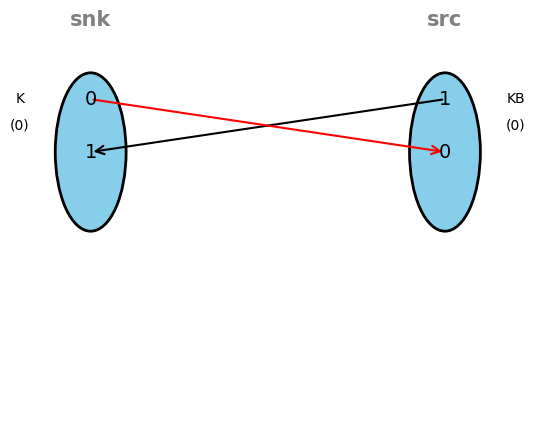

In [11]:
O1 = Kaon('+')
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(O1)
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/K+K+B.hdf5')
for diagram in Result:
    diagram.bulavision()

In [2]:
# <Corr>{kaon P=(0,0,0) A1u_1 SS_0} {kaon P=(0,0,0) A1u_1 SS_0}</Corr>
Hadron1 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u_1', Displacement = 'SS_0')
Hadron2 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u_1', Displacement = 'SS_0')
hadrons = [Hadron1, Hadron2]
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(5):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/K+K+B.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
 Perambulator for srcTime8_snkTime7 has been constructed using infos about srcTime7_snkTime8!
 Perambulator for srcTime13_snkTime0 has been constructed using infos about srcTime0_snkTime13!
 Perambulator for srcTime15_snkTime7 has been constructed using infos about srcTime7_snkTime15!
 Perambulator for srcTime8_snkTime0 has been constructed using infos about srcTime0_snkTime8!
 Perambulator for srcTime14_snkTime5 has been constructed using infos about srcTime5_snkTime14!
 Perambulator for srcTime10_snkTime1 has been constructed using infos about srcTime1_snkTime10!
 Perambulator for srcTime10_snkTime2 has been constructed using infos about srcTime2_snkTime10!
 Perambulator for srcTime8_snkTime6 has been constructed using infos about srcTime6_snkTime8!
 Perambulator for srcTime13_snkTime3 has been constructed using infos about srcTime3_snkTime13!
 Perambulator for srcTime8_snkTime2 has been constructed using info

In [3]:
correct_results = [5.313235228930697-1.2374852500411735e-10j, 0.3133572739538783-4.988096974483457e-05j, 0.03609650510588132+6.839565236897468e-06j,
                  0.004810827480657285-6.399942130230121e-07j,0.0006508455450624747-3.150678487208817e-06j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

0j
0j
0j
0j
0j


### Kaon (II)

In [4]:
# <Corr>{kaon P=(0,0,1) A2_1 SS_1}  {kaon P=(0,0,1) A2_1 SS_1}</Corr>
Hadron1 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'kaon_su',
          Momentum = (0,0,1), LGIrrep = 'A2_1', Displacement = 'SS_1')
Hadron2 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'kaon_su',
          Momentum = (0,0,1), LGIrrep = 'A2_1', Displacement = 'SS_1')
hadrons = [Hadron1, Hadron2]

complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/K+K+B.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
 Perambulator for srcTime8_snkTime7 has been constructed using infos about srcTime7_snkTime8!
 Perambulator for srcTime13_snkTime0 has been constructed using infos about srcTime0_snkTime13!
 Perambulator for srcTime15_snkTime7 has been constructed using infos about srcTime7_snkTime15!
 Perambulator for srcTime8_snkTime0 has been constructed using infos about srcTime0_snkTime8!
 Perambulator for srcTime14_snkTime5 has been constructed using infos about srcTime5_snkTime14!
 Perambulator for srcTime10_snkTime1 has been constructed using infos about srcTime1_snkTime10!
 Perambulator for srcTime10_snkTime2 has been constructed using infos about srcTime2_snkTime10!
 Perambulator for srcTime8_snkTime6 has been constructed using infos about srcTime6_snkTime8!
 Perambulator for srcTime13_snkTime3 has been constructed using infos about srcTime3_snkTime13!
 Perambulator for srcTime8_snkTime2 has been constructed using info

In [5]:
correct_results = [0.4917000173547394-1.5147355808889373e-11j, 0.010757429734652414+0.002969804584046444j, 0.0007009890811380045+0.0001437055144395958j,
                  0.00012234691581427997+0.0001378371121389662j, 1.0880171685894247e-05+1.1880906853283298e-05j,
                   2.554982966206718e-06+7.397305852454038e-07j,3.548861749885612e-08+2.028180053069103e-07j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

0j
0j
0j
0j
0j
0j
0j


In [6]:
res[0]

(0.4917000173547394-1.5147355808889373e-11j)

### Kaon (III)

In [7]:
# <Corr>{kaon P=(0,0,0) A1u_1 SS_0} {kaon P=(0,0,0) A1u_1 SD_1}</Corr>:
Hadron1 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u_1', Displacement = 'SS_0')
Hadron2 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u_1', Displacement = 'SD_1')
hadrons = [Hadron1, Hadron2]


complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/K+K+B.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
 Perambulator for srcTime8_snkTime7 has been constructed using infos about srcTime7_snkTime8!
 Perambulator for srcTime13_snkTime0 has been constructed using infos about srcTime0_snkTime13!
 Perambulator for srcTime15_snkTime7 has been constructed using infos about srcTime7_snkTime15!
 Perambulator for srcTime8_snkTime0 has been constructed using infos about srcTime0_snkTime8!
 Perambulator for srcTime14_snkTime5 has been constructed using infos about srcTime5_snkTime14!
 Perambulator for srcTime10_snkTime1 has been constructed using infos about srcTime1_snkTime10!
 Perambulator for srcTime10_snkTime2 has been constructed using infos about srcTime2_snkTime10!
 Perambulator for srcTime8_snkTime6 has been constructed using infos about srcTime6_snkTime8!
 Perambulator for srcTime13_snkTime3 has been constructed using infos about srcTime3_snkTime13!
 Perambulator for srcTime8_snkTime2 has been constructed using info

In [8]:
correct_results = [-5.485080478789817e-06-0.01773871949561849j, 1.2004716972565874e-05-0.0010292024430821243j,
                  -4.9036749771123316e-05-0.00012062606532584394j, 1.8042991178069682e-06-1.2415030815877924e-05j,
                  -1.647752403418175e-06-1.5108203736068658e-06j, -2.533833425994433e-07-2.4602977091122804e-07j,
                  7.3440529730488375e-09-3.5151051239063066e-08j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

0j
0j
0j
0j
0j
0j
0j


### Kaon (IV)

In [9]:
# <Corr>{kaon P=(0,0,0) A1u_1 SD_1} {kaon P=(0,0,0) A1u_1 SD_1}</Corr>
Hadron1 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u_1', Displacement = 'SD_1')
Hadron2 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u_1', Displacement = 'SD_1')
hadrons = [Hadron1, Hadron2]


complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/K+K+B.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
 Perambulator for srcTime8_snkTime7 has been constructed using infos about srcTime7_snkTime8!
 Perambulator for srcTime13_snkTime0 has been constructed using infos about srcTime0_snkTime13!
 Perambulator for srcTime15_snkTime7 has been constructed using infos about srcTime7_snkTime15!
 Perambulator for srcTime8_snkTime0 has been constructed using infos about srcTime0_snkTime8!
 Perambulator for srcTime14_snkTime5 has been constructed using infos about srcTime5_snkTime14!
 Perambulator for srcTime10_snkTime1 has been constructed using infos about srcTime1_snkTime10!
 Perambulator for srcTime10_snkTime2 has been constructed using infos about srcTime2_snkTime10!
 Perambulator for srcTime8_snkTime6 has been constructed using infos about srcTime6_snkTime8!
 Perambulator for srcTime13_snkTime3 has been constructed using infos about srcTime3_snkTime13!
 Perambulator for srcTime8_snkTime2 has been constructed using info

In [10]:
correct_results = [-0.17995320205903043+4.301835363623718e-12j,4.736206549745513e-05+1.0788939367028247e-06j,
                   4.916165496289272e-06-3.212047527632545e-07j,5.800200199421669e-07+5.987670769104738e-08j,
                   3.41753249823348e-08-5.698025704292855e-09j, 2.158584017211272e-08-3.208260915533398e-09j,
                   7.348582635936443e-09+2.435616111205428e-09j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

0j
0j
0j
0j
0j
0j
0j


### Kaon (V)

In [11]:
#<Corr>{kaon P=(0,0,0) A1u_1 SD_1} {kaon P=(0,0,0) A1u_1 SS_0}</Corr>
Hadron1 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u_1', Displacement = 'SD_1')
Hadron2 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u_1', Displacement = 'SS_0')
hadrons = [Hadron1, Hadron2]


complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/K+K+B.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
 Perambulator for srcTime8_snkTime7 has been constructed using infos about srcTime7_snkTime8!
 Perambulator for srcTime13_snkTime0 has been constructed using infos about srcTime0_snkTime13!
 Perambulator for srcTime15_snkTime7 has been constructed using infos about srcTime7_snkTime15!
 Perambulator for srcTime8_snkTime0 has been constructed using infos about srcTime0_snkTime8!
 Perambulator for srcTime14_snkTime5 has been constructed using infos about srcTime5_snkTime14!
 Perambulator for srcTime10_snkTime1 has been constructed using infos about srcTime1_snkTime10!
 Perambulator for srcTime10_snkTime2 has been constructed using infos about srcTime2_snkTime10!
 Perambulator for srcTime8_snkTime6 has been constructed using infos about srcTime6_snkTime8!
 Perambulator for srcTime13_snkTime3 has been constructed using infos about srcTime3_snkTime13!
 Perambulator for srcTime8_snkTime2 has been constructed using info

In [12]:
correct_results = [-5.48508341652711e-06+0.01773871949443836j, 0.000255975402372115+0.0007132377278121097j,
                  1.4913873046250119e-05+0.00011228909346855395j, -1.5952375927729903e-05+1.9478611410040054e-05j,
                  -1.3983790034077655e-06+2.446921196986814e-06j, 3.1604899264361626e-07+3.8513400770803673e-07j,
                  -1.1400610785546163e-08+5.296440773137943e-08j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

0j
0j
0j
0j
0j
0j
0j


### Nucleon (I)

In [13]:
#<Corr>{nucleon P=(0,0,0) G1g_1 SS_0} {nucleon P=(0,0,0) G1g_1 SS_0}</Corr> 
Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_1', Displacement = 'SS_0', dlen='dlen0')
Hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_1', Displacement = 'SS_0', dlen='dlen0')
hadrons = [Hadron1, Hadron2]

complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/NN.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
 Perambulator for srcTime8_snkTime7 has been constructed using infos about srcTime7_snkTime8!
 Perambulator for srcTime13_snkTime0 has been constructed using infos about srcTime0_snkTime13!
 Perambulator for srcTime15_snkTime7 has been constructed using infos about srcTime7_snkTime15!
 Perambulator for srcTime8_snkTime0 has been constructed using infos about srcTime0_snkTime8!
 Perambulator for srcTime14_snkTime5 has been constructed using infos about srcTime5_snkTime14!
 Perambulator for srcTime10_snkTime1 has been constructed using infos about srcTime1_snkTime10!
 Perambulator for srcTime10_snkTime2 has been constructed using infos about srcTime2_snkTime10!
 Perambulator for srcTime8_snkTime6 has been constructed using infos about srcTime6_snkTime8!
 Perambulator for srcTime13_snkTime3 has been constructed using infos about srcTime3_snkTime13!
 Perambulator for srcTime8_snkTime2 has been constructed using info

In [23]:
correct_results = [0.0003014282195708719+1.4478640785371858e-07j, 4.284943031770383e-06+1.5498840936793988e-06j,
                  1.4422620984853958e-07-4.5033456557986815e-08j, 2.6513636626996723e-09-2.7247473235876045e-09j,
                  4.846041404226831e-11-2.9327588702431805e-11j, 1.5809896198140648e-12-1.6502696227215908e-12j,
                   -1.3871318870420694e-14+2.122202737228897e-14j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

for i in range(len(res)):
    tst = correct_results[i] - res[i]
    if np.abs(tst.imag) > 1e-12 or np.abs(tst.real) > 1e-12:
        print(False)
    else:
        print(True)

(1.6805133673525319e-18+6.538035561619131e-21j)
7.898582233146351e-20j
(-5.293955920339377e-23-7.940933880509066e-22j)
(2.481541837659083e-24+6.617444900424222e-24j)
(-3.0373038117181485e-25-6.591595506281939e-25j)
(7.472090494253424e-27-2.5445497358808957e-26j)
(-8.346148377238305e-28-2.4296915880807164e-28j)
True
True
True
True
True
True
True


### Nucleon (II)

In [24]:
#<Corr>{nucleon P=(0,0,0) G1g_2 SS_0} {nucleon P=(0,0,0) G1g_2 SS_0}</Corr>
Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_2', Displacement = 'SS_0', dlen='dlen0')
Hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_2', Displacement = 'SS_0', dlen='dlen0')
hadrons = [Hadron1, Hadron2]

complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/NN.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
 Perambulator for srcTime8_snkTime7 has been constructed using infos about srcTime7_snkTime8!
 Perambulator for srcTime13_snkTime0 has been constructed using infos about srcTime0_snkTime13!
 Perambulator for srcTime15_snkTime7 has been constructed using infos about srcTime7_snkTime15!
 Perambulator for srcTime8_snkTime0 has been constructed using infos about srcTime0_snkTime8!
 Perambulator for srcTime14_snkTime5 has been constructed using infos about srcTime5_snkTime14!
 Perambulator for srcTime10_snkTime1 has been constructed using infos about srcTime1_snkTime10!
 Perambulator for srcTime10_snkTime2 has been constructed using infos about srcTime2_snkTime10!
 Perambulator for srcTime8_snkTime6 has been constructed using infos about srcTime6_snkTime8!
 Perambulator for srcTime13_snkTime3 has been constructed using infos about srcTime3_snkTime13!
 Perambulator for srcTime8_snkTime2 has been constructed using info

In [26]:
correct_results = [0.00030039787195030546-1.744900320148103e-07j, 4.230408254585984e-06+1.509849509210354e-06j,
                  1.402111854452368e-07-4.7661673187297724e-08j, 2.525481797910427e-09-2.6385986341764356e-09j,
                  3.7646453223177984e-11-2.8278297060512957e-11j, 1.6563771294195345e-12-1.4170101385674218e-12j,
                  -2.0993899502750057e-14+1.9596491324918984e-14j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

for i in range(len(res)):
    tst = correct_results[i] - res[i]
    if np.abs(tst.imag) > 1e-15 or np.abs(tst.real) > 1e-15:
        print(False)
    else:
        print(True)

(1.6805133673525319e-18+1.852884572118782e-21j)
(1.6940658945086007e-21+7.707999820014133e-20j)
(-1.3234889800848443e-22-7.874759431504823e-22j)
(2.481541837659083e-24+5.790264287871194e-24j)
(-3.42504472385238e-25-5.105255343100718e-25j)
(8.077935669463161e-27-2.282016826623343e-26j)
(-8.204153414298523e-28-4.70161099511723e-28j)
True
True
True
True
True
True
True


### Lambda (I)

In total there are 1 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 'd', 's']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Obtain propagators for the s quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 1 diagrams
 
**********************************************
 
 
********
3 combinations have been generated to do simplifications due to Collin's coefficients
Perform now the final simplification...

 0 diagrams have been reduced
To visualize the diagrams use the attribute bulavision() 
Results saved successfully
numerical factor =  1
Topology: 
[[[1, 0, 0], [0, 0, 0]], [[1, 0, 1], [0, 0, 1]], [[1, 0, 2], [0, 0, 2]]]


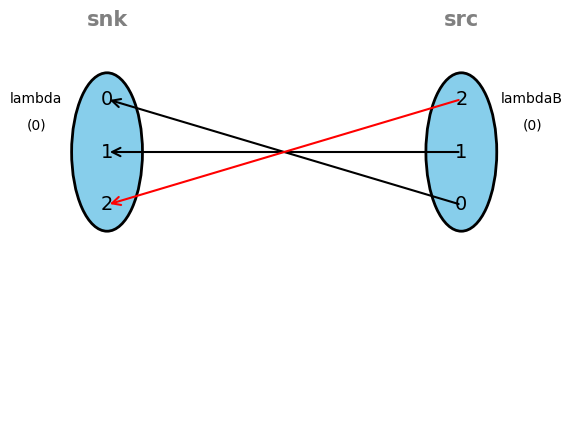

In [27]:
O1 = Lambda(0)
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(O1)
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/L0L0.hdf5')
for diagram in Result:
    diagram.bulavision()

In [31]:
#<Corr>{lambda P=(0,0,1) G2_1 SS_0} {lambda P=(0,0,1) G2_1 SS_0}</Corr>
Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'lambda_uds',
          Momentum = (0,0,1), LGIrrep = 'G2_1', Displacement = 'SS_0', dlen='dlen0')
Hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'lambda_uds',
          Momentum = (0,0,1), LGIrrep = 'G2_1', Displacement = 'SS_0', dlen='dlen0')
hadrons = [Hadron1, Hadron2]

complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/L0L0.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
 Perambulator for srcTime8_snkTime7 has been constructed using infos about srcTime7_snkTime8!
 Perambulator for srcTime13_snkTime0 has been constructed using infos about srcTime0_snkTime13!
 Perambulator for srcTime15_snkTime7 has been constructed using infos about srcTime7_snkTime15!
 Perambulator for srcTime8_snkTime0 has been constructed using infos about srcTime0_snkTime8!
 Perambulator for srcTime14_snkTime5 has been constructed using infos about srcTime5_snkTime14!
 Perambulator for srcTime10_snkTime1 has been constructed using infos about srcTime1_snkTime10!
 Perambulator for srcTime10_snkTime2 has been constructed using infos about srcTime2_snkTime10!
 Perambulator for srcTime8_snkTime6 has been constructed using infos about srcTime6_snkTime8!
 Perambulator for srcTime13_snkTime3 has been constructed using infos about srcTime3_snkTime13!
 Perambulator for srcTime8_snkTime2 has been constructed using info

In [32]:
correct_results = [-3.077753186553501e-05+2.7807329548041602e-09j, 9.12736477548813e-09-4.1764274918236207e-10j,
                  2.7160280351221543e-10-3.238324688617527e-10j, 6.876717886410605e-12-8.175758060480078e-12j,
                  -2.939490924514951e-14+6.506758142108084e-14j, -7.518908585422305e-15-5.584906587482788e-15j,
                  5.136559547125595e-16+3.3689353299549526e-16j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

0j
0j
0j
0j
0j
0j
0j


### Lambda (II)

In [33]:
#<Corr>{lambda P=(0,0,1) G2_1 SD_12} {lambda P=(0,0,1) G2_1 SS_0}</Corr>
Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'lambda_uds',
          Momentum = (0,0,1), LGIrrep = 'G2_1', Displacement = 'SD_12', dlen='dlen1')
Hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'lambda_uds',
          Momentum = (0,0,1), LGIrrep = 'G2_1', Displacement = 'SS_0', dlen='dlen0')
hadrons = [Hadron1, Hadron2]

complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128,
                                     Use_Triplet_Identity=True)
res = []
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/L0L0.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
 Perambulator for srcTime8_snkTime7 has been constructed using infos about srcTime7_snkTime8!
 Perambulator for srcTime13_snkTime0 has been constructed using infos about srcTime0_snkTime13!
 Perambulator for srcTime15_snkTime7 has been constructed using infos about srcTime7_snkTime15!
 Perambulator for srcTime8_snkTime0 has been constructed using infos about srcTime0_snkTime8!
 Perambulator for srcTime14_snkTime5 has been constructed using infos about srcTime5_snkTime14!
 Perambulator for srcTime10_snkTime1 has been constructed using infos about srcTime1_snkTime10!
 Perambulator for srcTime10_snkTime2 has been constructed using infos about srcTime2_snkTime10!
 Perambulator for srcTime8_snkTime6 has been constructed using infos about srcTime6_snkTime8!
 Perambulator for srcTime13_snkTime3 has been constructed using infos about srcTime3_snkTime13!
 Perambulator for srcTime8_snkTime2 has been constructed using info

In [34]:
correct_results = [1.4533169771377099e-08+1.9846226309445597e-07j, -4.489387156951679e-10+6.686084334939451e-09j,
                  9.687107204435481e-12+1.0437245470148878e-10j, 6.329673156004688e-12-1.655022415807599e-12j,
                  1.786266652335234e-13-1.8146430381357077e-14j, 7.411371889809892e-15-1.409273270688939e-14j,
                  3.3472055797573277e-16-3.448345273168473e-16j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

0j
0j
0j
0j
0j
0j
0j


### Lambda (III)

In [35]:
#<Corr>{lambda P=(0,0,1) G2_1 SD_12} {lambda P=(0,0,1) G2_1 SD_12}</Corr>
Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'lambda_uds',
          Momentum = (0,0,1), LGIrrep = 'G2_1', Displacement = 'SD_12', dlen='dlen1')
Hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'lambda_uds',
          Momentum = (0,0,1), LGIrrep = 'G2_1', Displacement = 'SD_12', dlen='dlen1')
hadrons = [Hadron1, Hadron2]

complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128,
                                     Use_Triplet_Identity=True)
res = []
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/L0L0.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
 Perambulator for srcTime8_snkTime7 has been constructed using infos about srcTime7_snkTime8!
 Perambulator for srcTime13_snkTime0 has been constructed using infos about srcTime0_snkTime13!
 Perambulator for srcTime15_snkTime7 has been constructed using infos about srcTime7_snkTime15!
 Perambulator for srcTime8_snkTime0 has been constructed using infos about srcTime0_snkTime8!
 Perambulator for srcTime14_snkTime5 has been constructed using infos about srcTime5_snkTime14!
 Perambulator for srcTime10_snkTime1 has been constructed using infos about srcTime1_snkTime10!
 Perambulator for srcTime10_snkTime2 has been constructed using infos about srcTime2_snkTime10!
 Perambulator for srcTime8_snkTime6 has been constructed using infos about srcTime6_snkTime8!
 Perambulator for srcTime13_snkTime3 has been constructed using infos about srcTime3_snkTime13!
 Perambulator for srcTime8_snkTime2 has been constructed using info

In [36]:
correct_results = [1.1250771842230787e-05-1.2725451539131117e-09j, 1.9997680734186264e-07+3.364074983744315e-08j,
                  7.624568099318903e-10+4.292937901592418e-10j, -1.466024606710914e-11-5.607324966878773e-11j,
                  8.706009241463271e-13-1.7835767907929031e-12j, -1.4792132213798587e-13-2.88898170068082e-13j,
                  -4.2507422263273726e-15-5.184910676747679e-15j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

0j
0j
0j
0j
0j
0j
0j


## Testing Using Known Results

In total there are 1 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 1 diagrams
 
**********************************************
 
 
********
0 combinations have been generated to do simplifications due to Collin's coefficients
Perform now the final simplification...

To visualize the diagrams use the attribute bulavision() 
Results saved successfully
numerical factor =  -1
Topology: 
[[[1, 0, 1], [0, 0, 1]], [[0, 0, 0], [1, 0, 0]]]


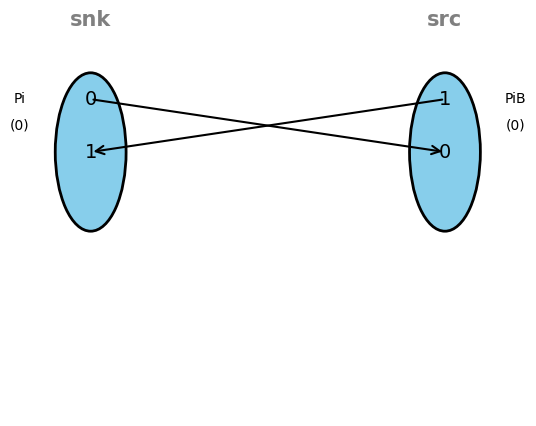

In [3]:
O1 = Pion(1)
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(O1)
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/Pi+Pi+.hdf5')
for diagram in Result:
    diagram.bulavision()

In [41]:
Hadron1 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'isovector_du',
          Momentum = (0,0,0), LGIrrep = 'A1um_1', Displacement = 'SS_0')
Hadron2 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'isovector_du',
          Momentum = (0,0,0), LGIrrep = 'A1um_1', Displacement = 'SS_0')
hadrons = [Hadron1, Hadron2]
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'data/perambs_ud_J.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': None, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'data/mode_triplets_1_Co.hdf5', Device = device, cplx128 = complex128)
res1 = []
res2 = []
for t in range(9):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/Pi+Pi+.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = None)
    res1.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
 Perambulator for srcTime14_snkTime0 has been constructed using infos about srcTime0_snkTime14!
 Perambulator for srcTime15_snkTime0 has been constructed using infos about srcTime0_snkTime15!
 Perambulator for srcTime4_snkTime0 has been constructed using infos about srcTime0_snkTime4!
 Perambulator for srcTime13_snkTime0 has been constructed using infos about srcTime0_snkTime13!
 Perambulator for srcTime5_snkTime0 has been constructed using infos about srcTime0_snkTime5!
 Perambulator for srcTime10_snkTime0 has been constructed using infos about srcTime0_snkTime10!
 Perambulator for srcTime2_snkTime0 has been constructed using infos about srcTime0_snkTime2!
 Perambulator for srcTime3_snkTime0 has been constructed using infos about srcTime0_snkTime3!
 Perambulator for srcTime1_snkTime0 has been constructed using infos about srcTime0_snkTime1!
 Perambulator for srcTime7_snkTime0 has been constructed using infos ab

In [46]:
pion = [0 for i in range(9)]
pion[0] = (4.280143667070952-1.6350227456098284e-10j)
pion[1] = (0.19890361370339574+2.0411337069269912e-19j)
pion[2] = (0.018045616035938555-9.287810014024311e-21j)
pion[3] = (0.0018946498116805485-1.1890622859063506e-20j)
pion[4] = (0.00020157319714492162-1.1739847651772713e-24j)
pion[5] = (1.8042330243095597e-05-6.394253214143184e-23j)
pion[6] = (2.2887691463923263e-06-3.339507463452103e-24j)
pion[7] = (3.0520964074138293e-07-4.321697482287652e-24j)
pion[8] = (1.3201802790095467e-07-2.0338252452333878e-25j)

for i in range(len(res1)):
    print(f'pion({i}) = {res1[i]}')
    print(f'diff    = {res1[i]-pion[i]}')
    print('______')

for i in range(len(res)):
    tst = res1[i]-pion[i]
    if np.abs(tst.imag) >= 1e-8 or np.abs(tst.real) >= 1e-8:
        print(False)
    else:
        print(True)

pion(0) = (4.280143659103805-2.0335842609376663e-10j)
diff    = (-7.96714694217826e-09-3.985615153278379e-11j)
______
pion(1) = (0.19890361519986796+3.517582141611928e-18j)
diff    = (1.4964722239163564e-09+3.3134687709192288e-18j)
______
pion(2) = (0.01804561597122822+7.042047856964318e-20j)
diff    = (-6.47103343132116e-11+7.970828858366749e-20j)
______
pion(3) = (0.001894649796956318-2.5147030434999853e-20j)
diff    = (-1.4724230515406056e-11-1.3256407575936347e-20j)
______
pion(4) = (0.0002015731975934616+1.4181918949832784e-21j)
diff    = (4.4853996818833286e-13+1.4193658797484556e-21j)
______
pion(5) = (1.804233037159407e-05-1.2265421559004897e-22j)
diff    = (1.2849847257751477e-13-5.871168344861713e-23j)
______
pion(6) = (2.2887691526249904e-06-2.7951580424046265e-23j)
diff    = (6.232664090507958e-15-2.4612072960594162e-23j)
______
pion(7) = (3.0520963776555407e-07-4.9317562428129555e-24j)
diff    = (-2.9758288669413956e-15-6.100587605253035e-25j)
______
pion(8) = (1.320180285

In [47]:
Hadron1 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'isovector_du',
          Momentum = (0,0,1), LGIrrep = 'A2m_1', Displacement = 'SS_1')
Hadron2 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'isovector_du',
          Momentum = (0,0,1), LGIrrep = 'A2m_1', Displacement = 'SS_1')
hadrons = [Hadron1, Hadron2]
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'data/perambs_ud_J.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': None, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'data/mode_triplets_1_Co.hdf5', Device = device, cplx128 = complex128)
res1 = []
res2 = []
for t in range(9):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/Pi+Pi+.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = None)
    res1.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
 Perambulator for srcTime14_snkTime0 has been constructed using infos about srcTime0_snkTime14!
 Perambulator for srcTime15_snkTime0 has been constructed using infos about srcTime0_snkTime15!
 Perambulator for srcTime4_snkTime0 has been constructed using infos about srcTime0_snkTime4!
 Perambulator for srcTime13_snkTime0 has been constructed using infos about srcTime0_snkTime13!
 Perambulator for srcTime5_snkTime0 has been constructed using infos about srcTime0_snkTime5!
 Perambulator for srcTime10_snkTime0 has been constructed using infos about srcTime0_snkTime10!
 Perambulator for srcTime2_snkTime0 has been constructed using infos about srcTime0_snkTime2!
 Perambulator for srcTime3_snkTime0 has been constructed using infos about srcTime0_snkTime3!
 Perambulator for srcTime1_snkTime0 has been constructed using infos about srcTime0_snkTime1!
 Perambulator for srcTime7_snkTime0 has been constructed using infos ab

In [50]:
pion = [0 for i in range(9)]
pion[0] = (0.39681125942845186-2.4863527388211196e-11j)
pion[1] = (0.006854588941944439+0.0018739050089830213j)
pion[2] = (0.00035147845393663704+7.051514602640161e-05j)
pion[3] = (4.853857783263503e-05+5.5342007300572974e-05j)
pion[4] = (3.512518353425199e-06+3.784624963843414e-06j)
pion[5] = (6.305396259865426e-07+1.6889171994483086e-07j)
pion[6] = (6.545752107319039e-09+4.143195530282928e-08j)
pion[7] = (6.449180817163239e-10+2.1060350468251335e-09j)
pion[8] = (1.2538175809018842e-09-1.1807728582266968e-10j)

for i in range(len(res1)):
    print(f'pion({i}) = {res1[i]}')
    print(f'diff    = {res1[i]-pion[i]}')
    print('______')


for i in range(len(res)):
    tst = res1[i]-pion[i]
    if np.abs(tst.imag) > 1e-9 or np.abs(tst.real) > 1e-9:
        print(False)
    else:
        print(True)

pion(0) = (0.3968112586609803-3.26608212317895e-11j)
diff    = (-7.674715307715019e-10-7.797293843578301e-12j)
______
pion(1) = (0.006854588966852254+0.0018739049724863146j)
diff    = (2.4907814526187178e-11-3.649670669847449e-11j)
______
pion(2) = (0.0003514784430399821+7.051514948234778e-05j)
diff    = (-1.0896654943377132e-11+3.4559461683462273e-12j)
______
pion(3) = (4.853857787821044e-05+5.534200673563615e-05j)
diff    = (4.5575414102383416e-14-5.64936823450185e-13j)
______
pion(4) = (3.5125184538213494e-06+3.7846249468333477e-06j)
diff    = (1.0039615047240016e-13-1.701006651884992e-14j)
______
pion(5) = (6.305396287180964e-07+1.6889173237342682e-07j)
diff    = (2.7315538823156752e-15+1.2428595961983522e-14j)
______
pion(6) = (6.545752003225722e-09+4.143195476854923e-08j)
diff    = (-1.0409331652798559e-16-5.34280047228949e-16j)
______
pion(7) = (6.449179896016225e-10+2.1060350245599668e-09j)
diff    = (-9.211470138879019e-17-2.226516678135003e-17j)
______
pion(8) = (1.2538176069

## Testing Using Miguels Results

In total there are 4 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['d']
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
****** Obtain Diagrams for Correlator 2 ******
We have following flavors ['d', 'u']
Obtain propagators for the d quarks...
Done.
Obtain propagators for the u quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 1 diagrams
 
****** Obtain Diagrams for Correlator 3 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redunda

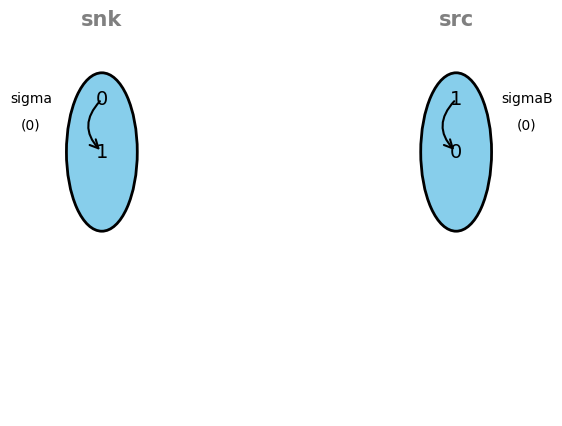

numerical factor =  -0.9999999999999998
Topology: 
[[[1, 0, 1], [0, 0, 1]], [[0, 0, 0], [1, 0, 0]]]


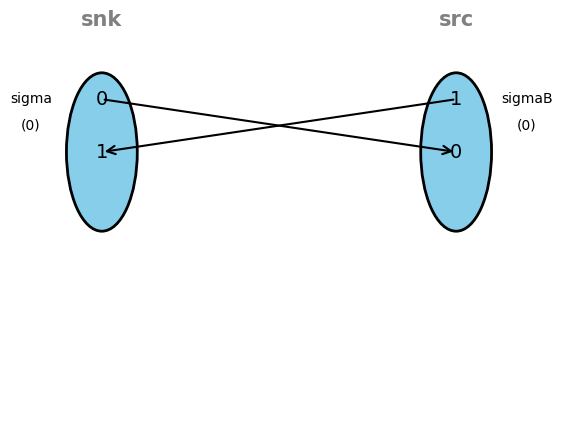

In [8]:
O1 = sigma(0)
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(O1)
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/SigmaSigmaB.hdf5')
for diagram in Result:
    diagram.bulavision()

In [52]:
Hadron1 = Hadron(File_Info_Path='M_Tests/meson_operators.h5', Hadron_Type='meson_operators', Hadron_Position=(1, 0), 
                 Flavor='isoscalar', Momentum=[0, 0, 0], LGIrrep='A1gp_1', Displacement='SS_0')
Hadron2 = Hadron(File_Info_Path='M_Tests/meson_operators.h5', Hadron_Type='meson_operators', Hadron_Position=(0, 0),
                 Flavor='isoscalar', Momentum=[0, 0, 0], LGIrrep='A1gp_1', Displacement='SS_0')

complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = ['M_Tests/light_quark_perambulator_quda_5_More.hdf5', 
                                                              'M_Tests/light_quark_perambulator_quda_5.hdf5'], 
                                         Device = device, Double_Reading = True, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': None, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'M_Tests/mode_doublets_5.hdf5', Device = device, cplx128 = complex128)

Contractor = PyCorrTorch(SinkTime=4, SourceTime=0, Hadrons=[Hadron1, Hadron2], Path_Wicktract='DiagramsTests/SigmaSigmaB.hdf5')
Contracted = Contractor.TorchTractor(All_Perambulators=perambulator, ModeDoublets=modeDoublet)
Contracted-(39108.66379277315-5.5155943025067997e-11j)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 3 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
3 tensor contractions to be performed
0
1
2
([((((1, 0),), (0,)), tensor(140.8438-1.8451e-14j, dtype=torch.complex128)), ((((0, 0),), (0,)), tensor(138.7993-1.7708e-13j, dtype=torch.complex128)), ((((1, 0), (0, 0)), (1,)), tensor(-10.6130+2.0289e-14j, dtype=torch.complex128))], [np.float64(1.9999999999999996), np.float64(-0.9999999999999998)])
Correlator_0 = (39108.66379277315-5.5023529518574877e-11j)


1.3241350649312006e-13j

In [54]:
Hadron3 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'isovector_du',
          Momentum = (0,0,0), LGIrrep = 'A1um_1', Displacement = 'SS_0')
Hadron4 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'isovector_du',
          Momentum = (0,0,0), LGIrrep = 'A1um_1', Displacement = 'SS_0')
hadrons = [Hadron3, Hadron4]

complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = ['M_Tests/light_quark_perambulator_quda_5.hdf5'], 
                                         Device = device, Double_Reading = True, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': None, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'M_Tests/mode_doublets_5.hdf5', Device = device, cplx128 = complex128)
test0            = PyCorrTorch(SinkTime = 4, SourceTime = 0, 
                               Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/Pi+Pi+.hdf5')
test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = None)
test0_contracted-(78.13719804676474-5.081876067246993e-16j)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
 Perambulator for srcTime4_snkTime0 has been constructed using infos about srcTime0_snkTime4!
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
0
([((((1, 0), (0, 0)), (0,)), tensor(-78.1372+8.9772e-17j, dtype=torch.complex128))], [np.int64(-1)])
Correlator_0 = (78.13719804676475-8.977193988179977e-17j)


(1.4210854715202004e-14+4.1841566684289957e-16j)

## Testing Using identites from Colin's Book

In total there are 1 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
**********************************************
 
 
********
3 combinations have been generated to do simplifications due to Collin's coefficients
Perform now the final simplification...

Diagram 1 has been added to diagram 0
 1 diagrams have been reduced
To visualize the diagrams use the attribute bulavision() 
Results saved successfully
numerical factor =  -2
Topology: 
[[[1, 0, 0], [0, 0, 1]], [[1, 0, 1], [0, 0, 0]], [[1, 0, 2], [0, 0, 2]]]


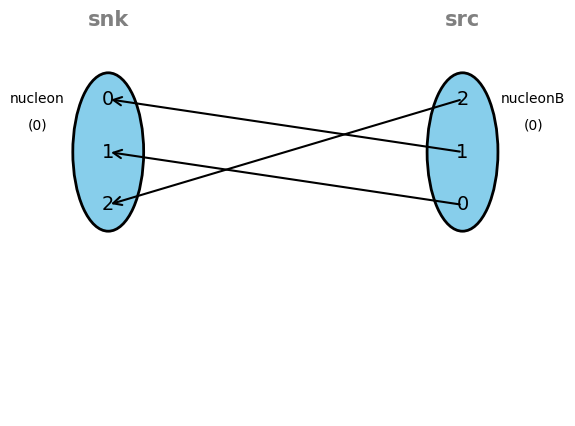

In [2]:
O1 = Nucleon(1/2)
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(O1)
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/NN.hdf5')
tcmpr = []
for res in Result:
    a = res.bulavision()
    tcmpr.append(np.array(a))

In [55]:
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'data/perambs_ud_J.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': None, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet_old         = PyTor_MTriplet(Path_ModeTriplet = 'data/mode_triplets_1_Co.hdf5', Device = device, cplx128 = complex128)
modeTriplet = {}
for i in range(9):
    new_name = 'px0_py0_pz0_ddir0_t'+str(i)
    modeTriplet[new_name] = modeTriplet_old[f'px0_py0_pz0_ddir0_dlen0_t{str(i)}']



Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_1', Displacement = 'SS_0')
Hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_1', Displacement = 'SS_0')
hadrons = [Hadron1, Hadron2]
res1 = []
for t in range(9):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/NN.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res1.append(test0_contracted)









Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_2', Displacement = 'SS_0')
Hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_2', Displacement = 'SS_0')
hadrons = [Hadron1, Hadron2]
res2 = []
for t in range(9):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/NN.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res2.append(test0_contracted)




final_res = []

if len(res1) != len(res2):
    raise TypeError('Error!')
else:
    for i in range(len(res1)):
        res_i = (res1[i] + res2[i]) / 2
        final_res.append(res_i)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
 Perambulator for srcTime14_snkTime0 has been constructed using infos about srcTime0_snkTime14!
 Perambulator for srcTime15_snkTime0 has been constructed using infos about srcTime0_snkTime15!
 Perambulator for srcTime4_snkTime0 has been constructed using infos about srcTime0_snkTime4!
 Perambulator for srcTime13_snkTime0 has been constructed using infos about srcTime0_snkTime13!
 Perambulator for srcTime5_snkTime0 has been constructed using infos about srcTime0_snkTime5!
 Perambulator for srcTime10_snkTime0 has been constructed using infos about srcTime0_snkTime10!
 Perambulator for srcTime2_snkTime0 has been constructed using infos about srcTime0_snkTime2!
 Perambulator for srcTime3_snkTime0 has been constructed using infos about srcTime0_snkTime3!
 Perambulator for srcTime1_snkTime0 has been constructed using infos about srcTime0_snkTime1!
 Perambulator for srcTime7_snkTime0 has been constructed using infos ab

In [56]:
nucleon = [0 for i in range(9)]
for t in range(9):
    P = perambulators_light[f'srcTime0_snkTime{t}']
    Bso = modeTriplet['px0_py0_pz0_ddir0_t0']
    Bsi = modeTriplet[f'px0_py0_pz0_ddir0_t{t}']
    CN1 = torch.einsum('klm,KLM,kK,lL,mM->', Bsi, Bso.conj(),P[0,0],P[0,0], P[1,1]) - torch.einsum('klm,KLM,kK,lL,mM->', Bsi, Bso.conj(),P[0,0],P[0,1], P[1,0])
    CN2 = torch.einsum('klm,KLM,kK,lL,mM->', Bsi, Bso.conj(),P[1,1],P[0,0], P[1,1]) - torch.einsum('klm,KLM,kK,lL,mM->', Bsi, Bso.conj(),P[1,1],P[0,1], P[1,0])
    to_add = 3 * (CN1.item()+CN2.item())/2
    nucleon[t] = to_add

In [57]:
for i in range(len(final_res)):
    print(f'nucleon({i}) = {final_res[i].real }')
    print(f'diff    = {final_res[i].real-nucleon[i].real}')
    print('______')


for i in range(len(res)):
    tst = final_res[i].real-nucleon[i].real
    if np.abs(tst.imag) > 1e-15:
        print(False)
    else:
        print(True)

nucleon(0) = 0.0003009130457605867
diff    = 5.421010862427522e-20
______
nucleon(1) = 4.257675643178171e-06
diff    = 0.0
______
nucleon(2) = 1.4221869764688795e-07
diff    = -5.293955920339377e-23
______
nucleon(3) = 2.5884227303050576e-09
diff    = 0.0
______
nucleon(4) = 4.3053433632724015e-11
diff    = 1.2924697071141057e-26
______
nucleon(5) = 1.6186833746167876e-12
diff    = -2.0194839173657902e-28
______
nucleon(6) = -1.743260918658528e-14
diff    = 3.1554436208840472e-30
______
nucleon(7) = -1.117968776196914e-15
diff    = 0.0
______
nucleon(8) = 2.1203942426327772e-17
diff    = -9.244463733058732e-33
______
True
True
True
True
True
True
True
